# sets up

In [2]:
import math
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot

import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from __future__ import unicode_literals

from AdvisorMao_ import *
from gistool import *
from metpy.units import units
import metpy.calc as mpcalc
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
file_shp = '/portal3/gis/Mekong_Delta/LANCANG_MEKONG.shp'

In [70]:
from numpy import polyfit, poly1d

In [283]:
df1 = pd.read_csv('height_flux.csv')

In [294]:
df=df1.sort_values(by=['level'],ascending=False)

In [295]:
df

level  fluxin_mean  fluxout_mean  fluxin_2019  fluxout_2019  windUin_m  \
0   1000     9.314430      6.590944    10.981787      8.159651   0.280213   
1    925    20.702014     12.399526    22.511292     15.257308   0.405500   
2    850    44.454829     40.383496    49.172689     47.255933   1.660108   
3    700    29.920948     25.503651    30.662541     26.784160   3.170927   
4    600    16.677089     15.295346    15.596329     14.844300   2.559478   
5    500     7.146278      6.687556     6.031200      5.731365   1.676588   
6    400     0.888267      1.109363     0.778833      0.977951   0.448236   
7    300     0.928129      0.696171     1.142633      1.020000  -1.154724   

   windUout_m  windUin_19  windUout_19  windVin_m  windVout_m  windVin_19  \
0    0.295464    0.448796     0.431690   0.686742    0.479748    0.766203   
1    0.731219    0.617634     0.937657   1.701593    0.780599    1.811026   
2    1.507894    2.101346     1.867485   1.365013    1.290929    1.089048   
3    2.652742    3.247121     2.861252   0.595448    0.784743   -0.221576   
4    2.396654    2.498529     2.425246   0.649675    0.568437   -0.131485   
5    1.612891    1.627920     1.580992   0.650314    0.590838    0.033540   
6    0.552750    0.257497     0.343902   0.173153    0.161007   -0.388083   
7   -0.818326   -1.486194    -1.146914  -1.097105   -1.000507   -1.199717   

   windVout_19     qin_m    qout_m    qin_19   qout_19  
0     0.543610  0.016119  0.015398  0.016014  0.015476  
1     0.908182  0.015474  0.015137  0.015347  0.015219  
2     1.333280  0.013726  0.013701  0.013718  0.013751  
3     0.088454  0.009001  0.009078  0.009183  0.009223  
4    -0.086298  0.006173  0.006126  0.006071  0.006018  
5    -0.052220  0.003848  0.003788  0.003619  0.003552  
6    -0.465091  0.001760  0.001719  0.001671  0.001634  
7    -1.458052  0.000584  0.000566  0.000570  0.000550

In [296]:

finm = df.fluxin_mean.values
foutm = df.fluxout_mean.values
fin19 = df.fluxin_2019.values
fout19 = df.fluxout_2019.values
finano = fin19-finm
foutano = fout19-foutm

umi = df.windUin_m.values
umo = df.windUout_m.values
u19i = df.windUin_19.values
u19o = df.windUout_19.values
uinano = u19i-umi
uoutano = u19o-umo

vmi = df.windVin_m.values
vmo = df.windVout_m.values
v19i = df.windVin_19.values
v19o = df.windVout_19.values
vinano = v19i-vmi
voutano = v19o-vmo

qmi = df.qin_m.values
qmo = df.qout_m.values
q19i = df.qin_19.values
q19o = df.qout_19.values
qinano = u19i-umi
qoutano = u19o-umo

(1000.0, 300.0)

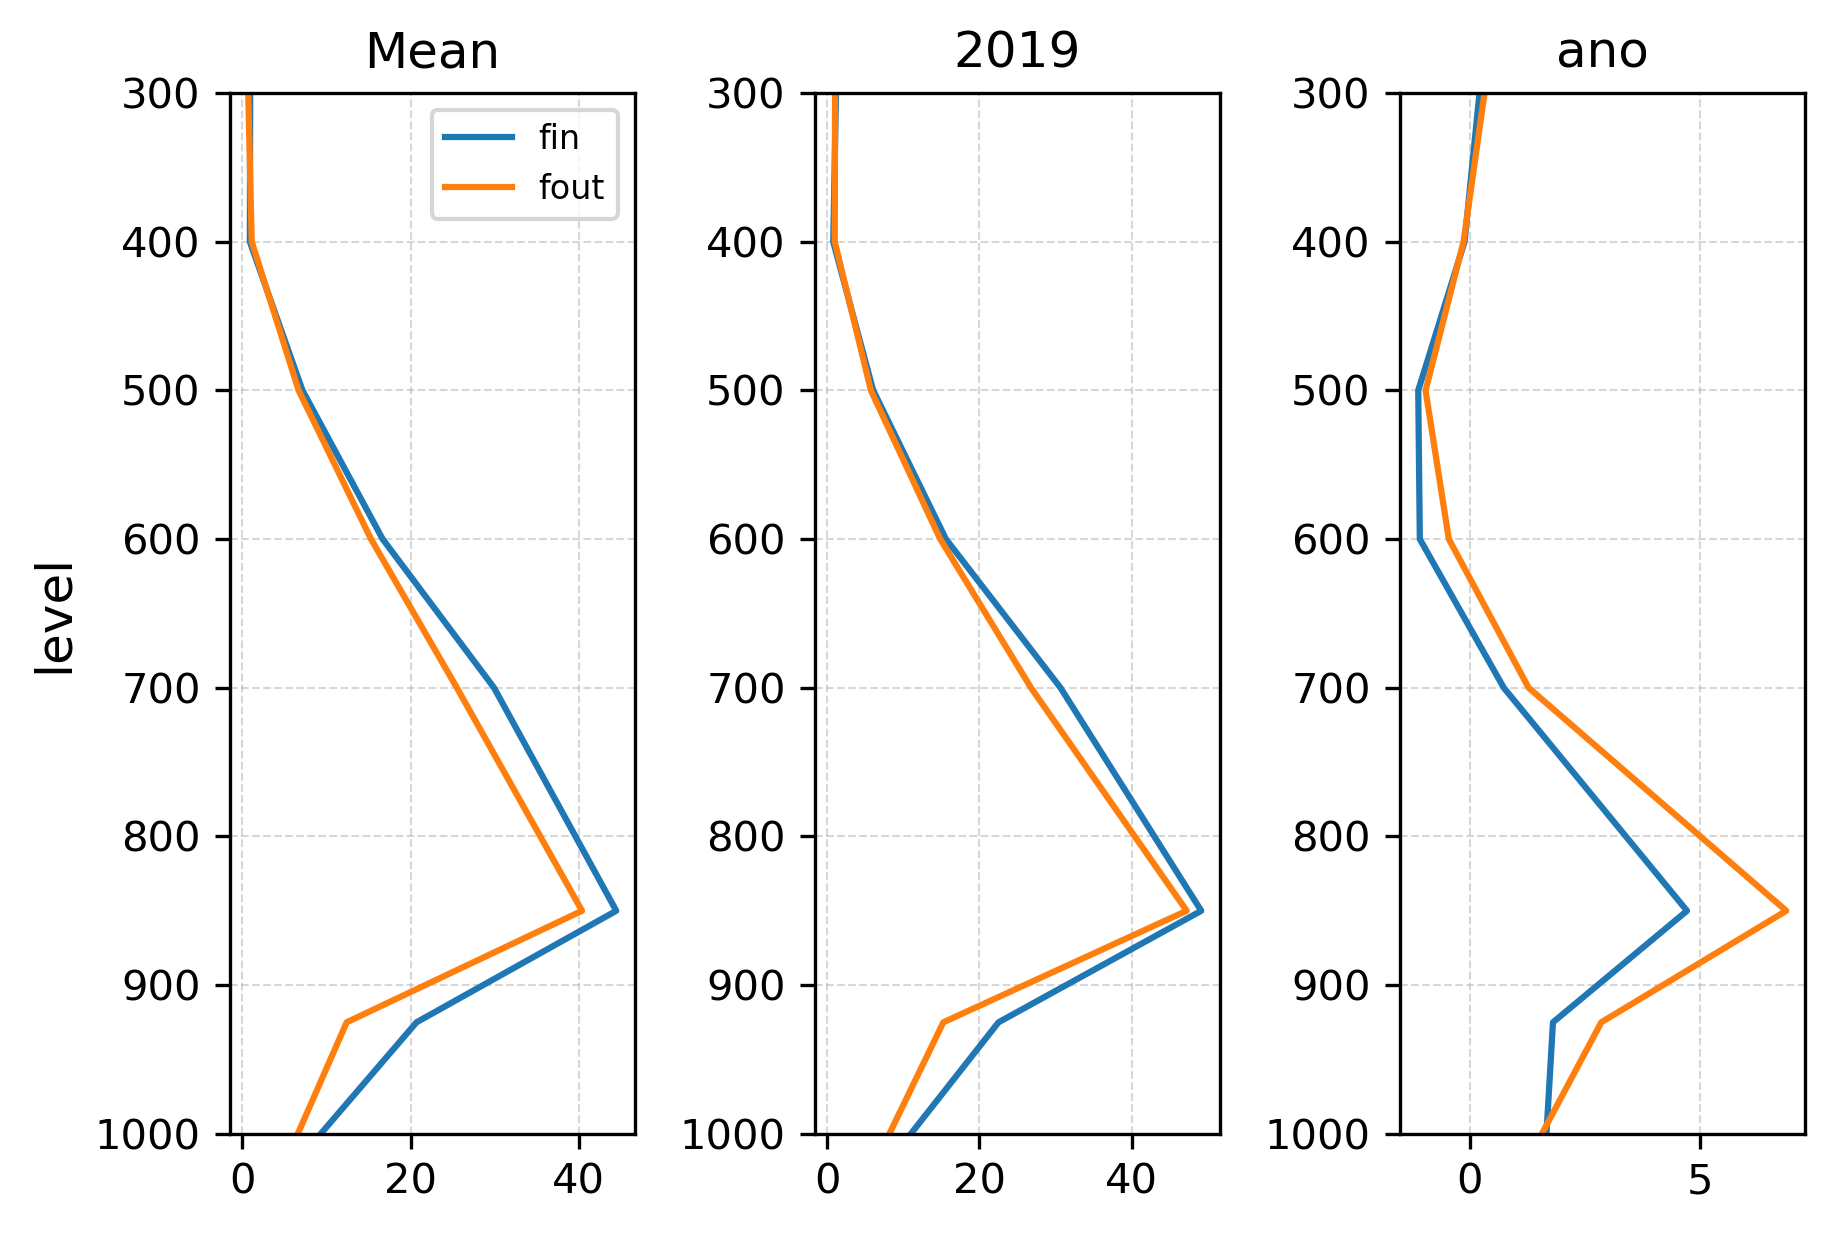

In [303]:
fig, axs = plt.subplots(1, 3,dpi=300)
finano = fin19-finm
foutano = fout19-foutm
axs[0].plot( finm,df.level,label='fin')
axs[0].plot( foutm,df.level,label='fout')
axs[1].plot( fin19,df.level)
axs[1].plot(fout19,df.level)
axs[2].plot( finano,df.level)
axs[2].plot( foutano,df.level)
plt.tight_layout()
axs[0].legend(loc='best',fontsize=8)
axs[0].set_title('Mean',fontsize = 12)
axs[1].set_title('2019',fontsize = 12)
axs[2].set_title('ano',fontsize = 12)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[0].set_ylabel('level',fontsize = 12)
axs[0].set_ylim(1000,300)
axs[1].set_ylim(1000,300)
axs[2].set_ylim(1000,300)

(1000.0, 300.0)

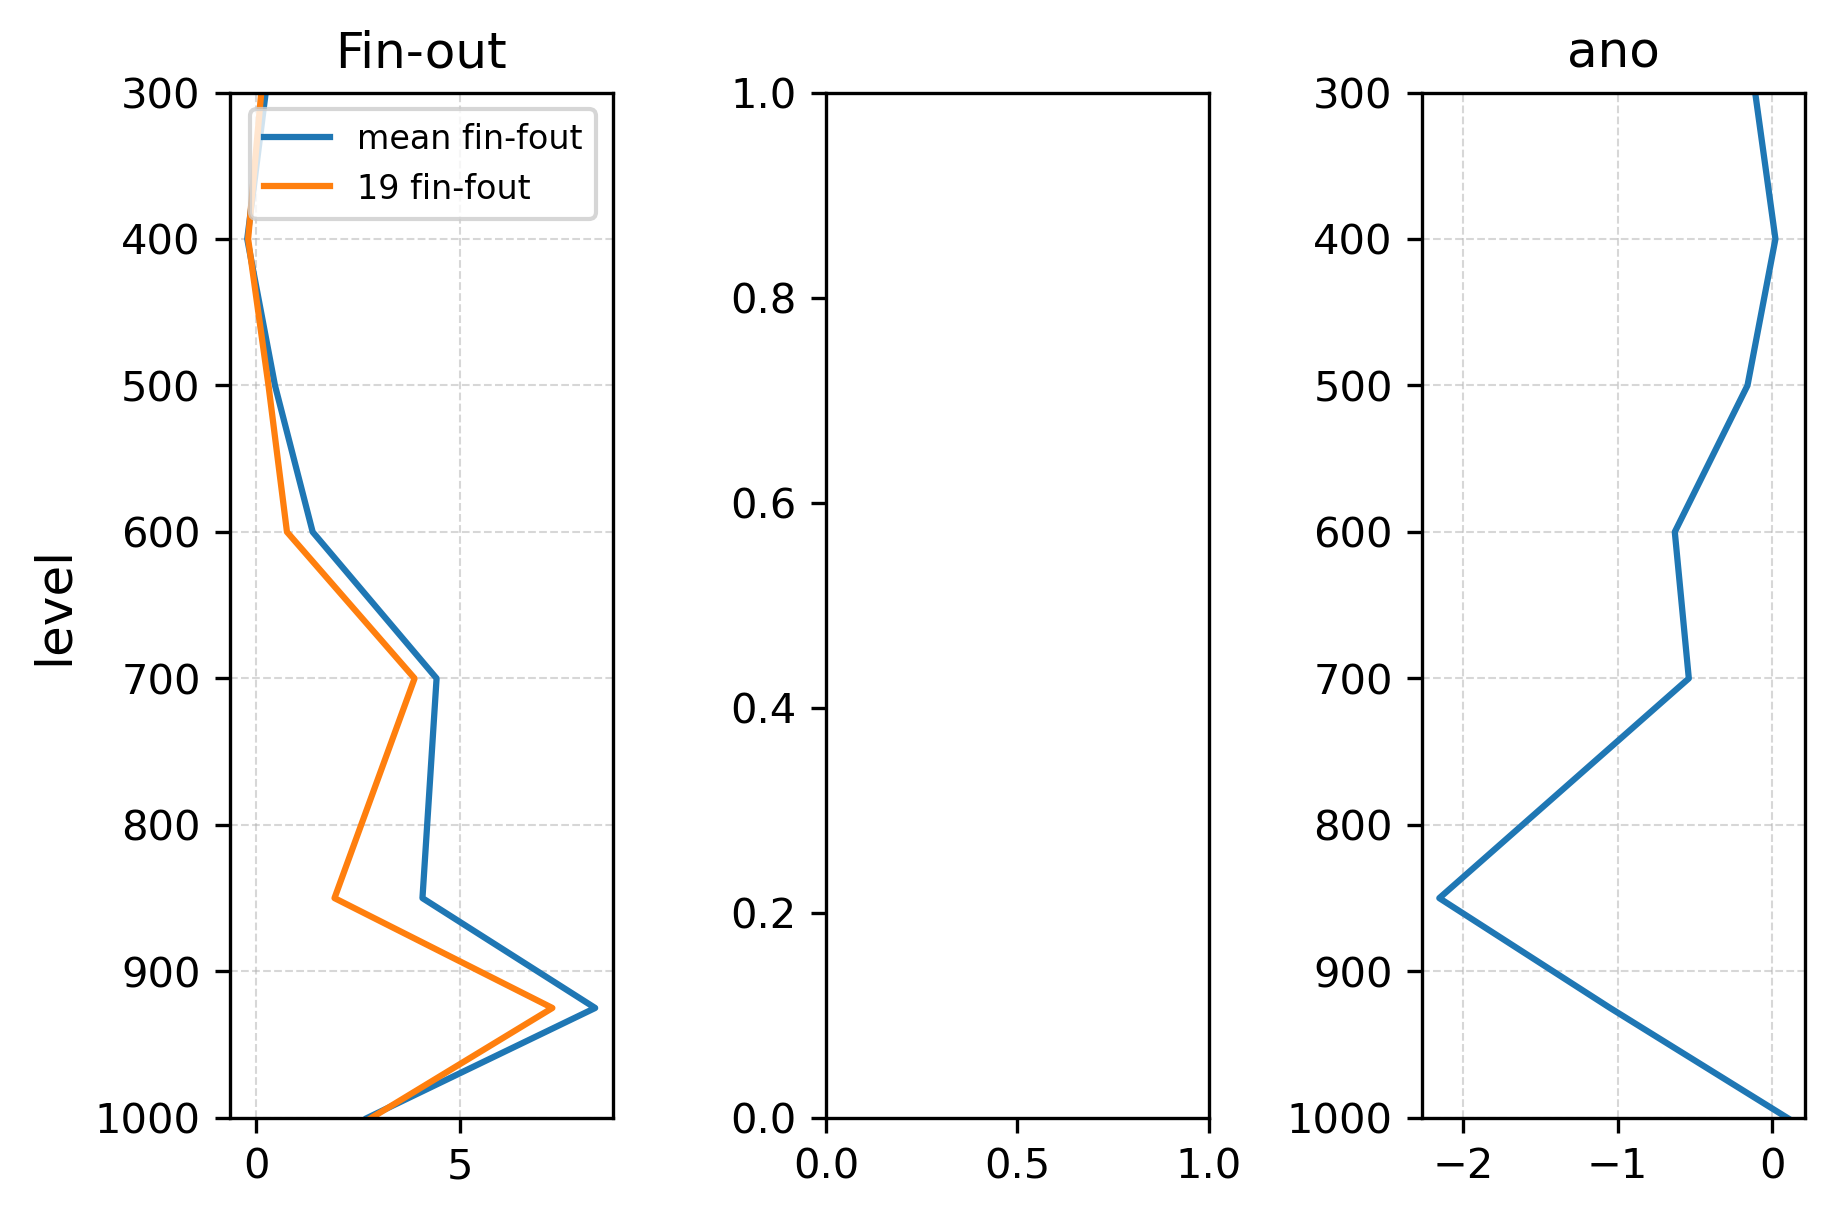

In [311]:
fig, axs = plt.subplots(1, 3,dpi=300)
finano = fin19-finm
foutano = fout19-foutm
axs[0].plot( finm-foutm,df.level,label='mean fin-fout')

axs[0].plot( fin19-fout19,df.level,label='19 fin-fout')

axs[2].plot( finano-foutano,df.level,label='ano')

plt.tight_layout()
axs[0].legend(loc='best',fontsize=8)
axs[0].set_title('Fin-out',fontsize = 12)
#axs[1].set_title('2019',fontsize = 12)
axs[2].set_title('ano',fontsize = 12)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.5)
#axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[0].set_ylabel('level',fontsize = 12)
axs[0].set_ylim(1000,300)
#axs[1].set_ylim(1000,300)
axs[2].set_ylim(1000,300)

(1000.0, 300.0)

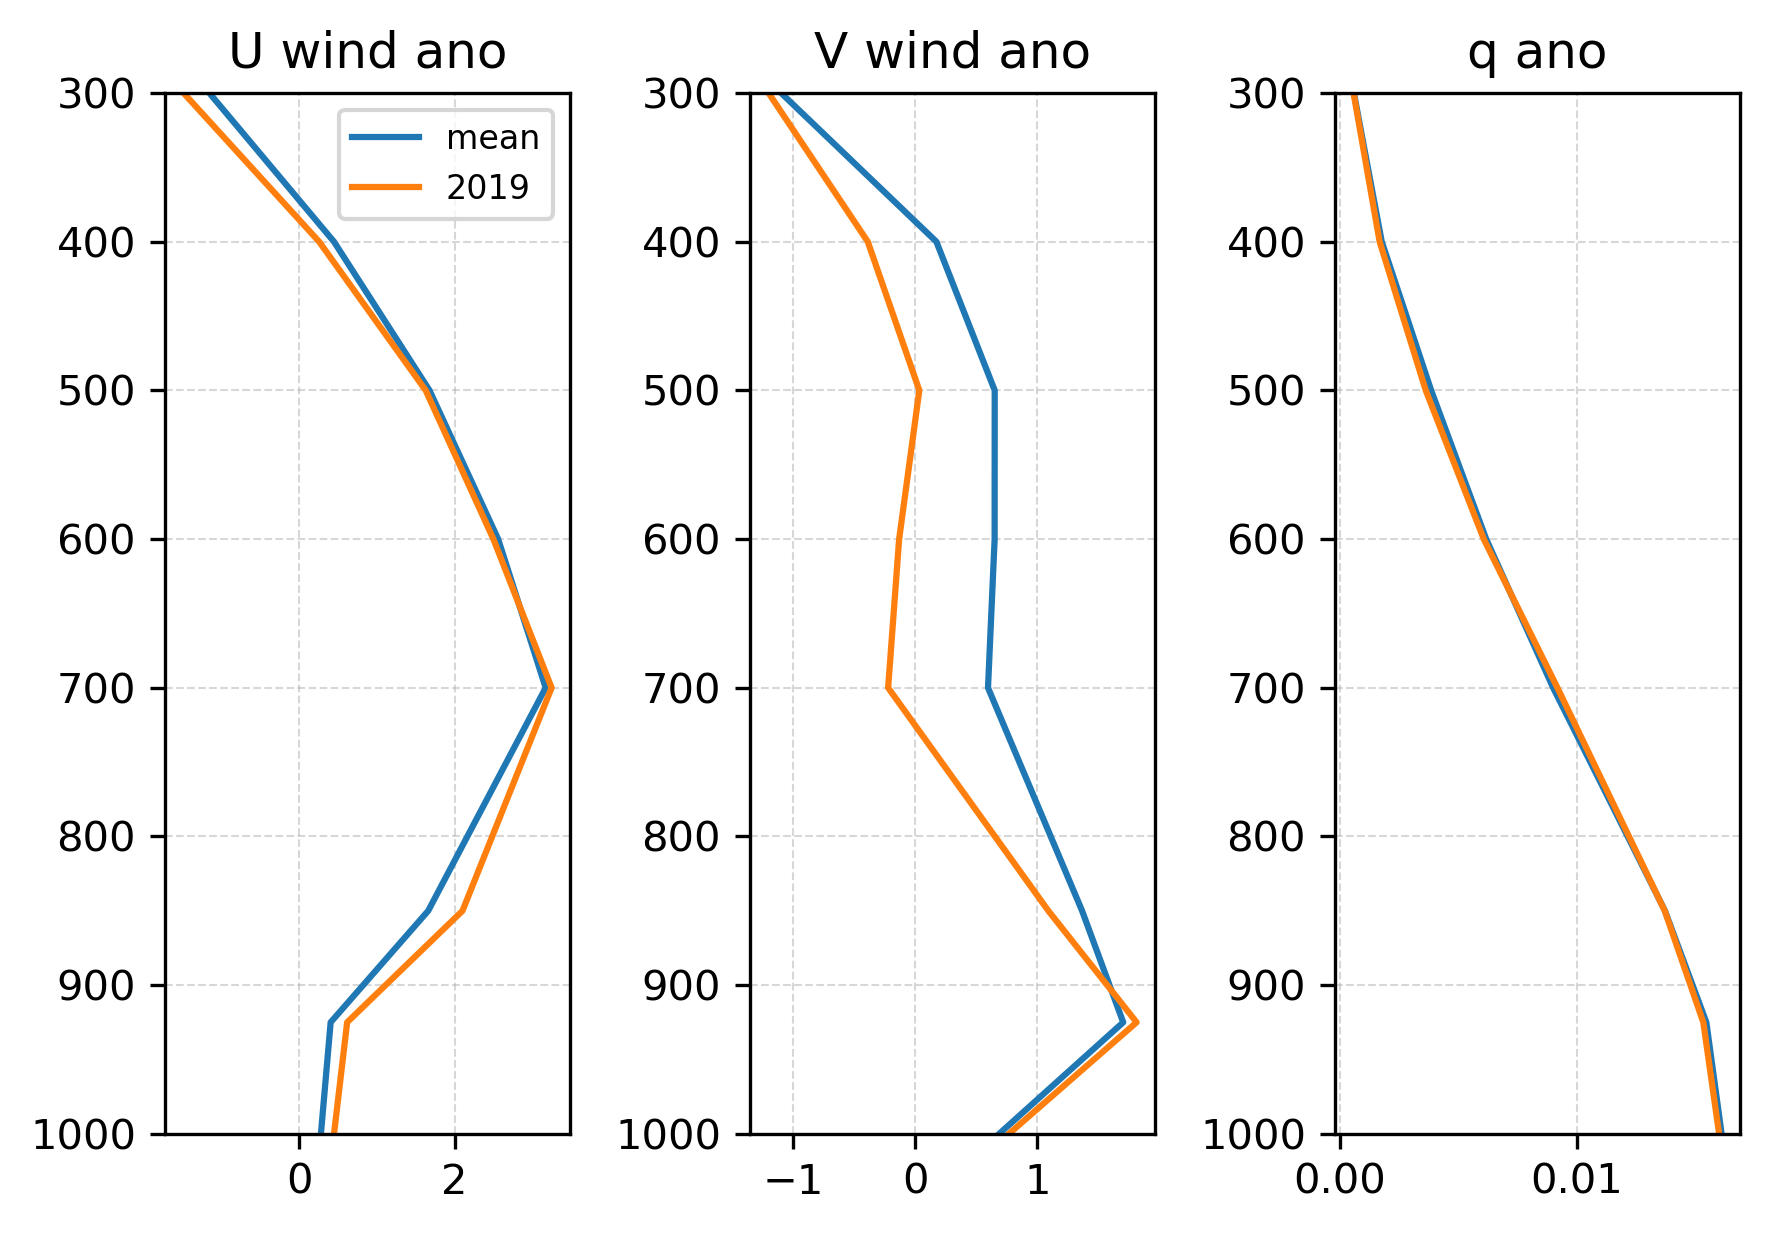

In [314]:
fig, axs = plt.subplots(1, 3,dpi=300)
finano = fin19-finm
foutano = fout19-foutm
axs[0].plot( umi,df.level,label='mean')
axs[0].plot( u19i,df.level,label='2019')
axs[1].plot( vmi,df.level)
axs[1].plot( v19i,df.level)
axs[2].plot( qmi,df.level)
axs[2].plot( q19i,df.level)

plt.tight_layout()
axs[0].legend(loc='best',fontsize=8)
axs[0].set_title('U wind ano',fontsize = 12)
axs[1].set_title('V wind ano',fontsize = 12)
axs[2].set_title('q ano',fontsize = 12)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[0].set_ylim(1000,300)
axs[1].set_ylim(1000,300)
axs[2].set_ylim(1000,300)

In [8]:
dfflux = pd.read_csv('flux22.csv')

In [76]:
dfflux = dfflux.head(63)

In [77]:
dfflux

year       prec          e        F_in       F_out        p_a     ratio  \
0   1959  37.453420 -14.025759  172.524994  155.941201  35.990462  0.039061   
1   1960  41.265823 -13.224114  135.533925  116.215986  39.346303  0.046516   
2   1961  43.257812 -13.883959  144.979338  124.835091  41.281165  0.045695   
3   1962  35.503659 -14.322235  134.205818  119.771798  33.705177  0.050656   
4   1963  41.555917 -13.507307  150.598021  131.578419  39.772305  0.042921   
..   ...        ...        ...         ...         ...        ...       ...   
58  2017  40.455987 -14.018590  127.249934  108.088278  38.343894  0.052207   
59  2018  42.857113 -14.034302  153.556040  132.762598  40.984230  0.043701   
60  2019  28.063629 -13.855107  133.378588  123.364090  26.678000  0.049375   
61  2020  32.650654 -13.955923  149.747131  136.151213  31.196930  0.044524   
62  2021  33.230237 -14.680907  125.114117  111.063989  31.388662  0.055419   

    ratio100       p_e     F_out_a    F_out_e  
0   3.906073  1.462958  136.534532  12.562802  
1   4.651596  1.919519   96.187621  11.304595  
2   4.569457  1.976647  103.698173  11.907312  
3   5.065624  1.798482  100.500641  12.523754  
4   4.292076  1.783612  110.825715  11.723696  
..       ...       ...         ...        ...  
58  5.220717  2.112093   88.906040  11.906497  
59  4.370064  1.872883  112.571810  12.161419  
60  4.937456  1.385629  106.700588  12.469477  
61  4.452358  1.453724  118.550201  12.502199  
62  5.541865  1.841575   93.725455  12.839332  

[63 rows x 11 columns]

In [78]:
!pwd

/portal1/dell/wang-k/water vapor data


In [79]:
import sys
sys.path.append('/portal1/dell/wang-k/ERA5_prec_daily')

In [80]:
from advisor import *

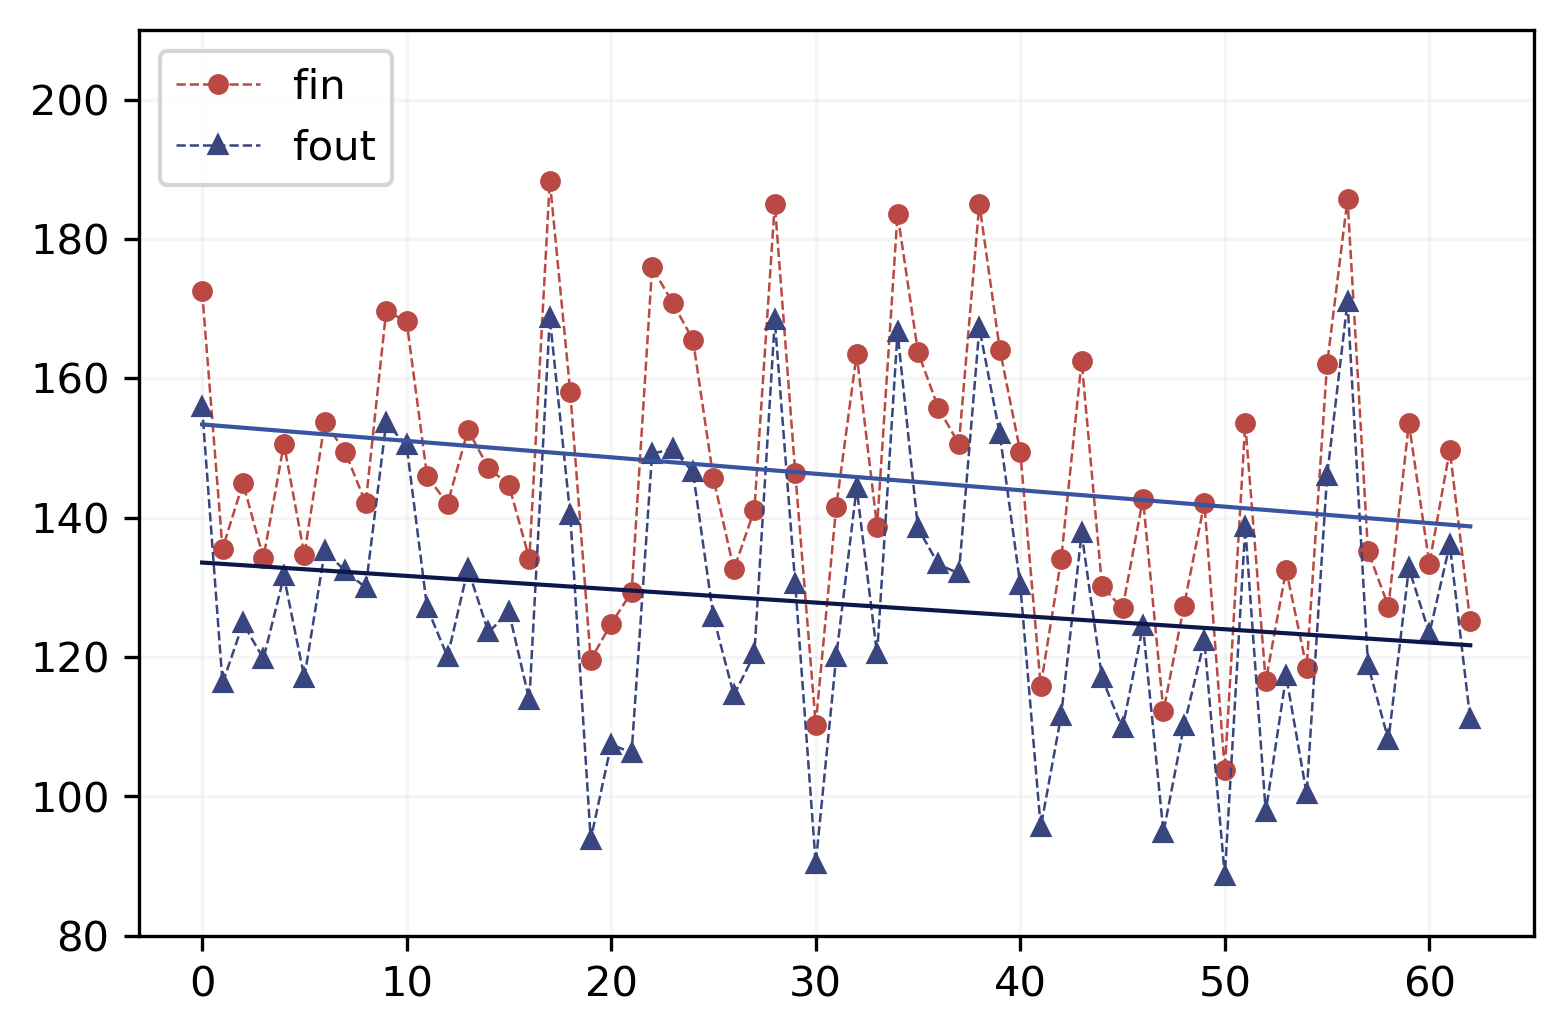

 
-0.2359 x + 153.4  
-0.1914 x + 133.6


In [244]:
x = np.arange(0,63)
coeff1 = polyfit(x, dfflux['F_in'], 1)
coeff2 = polyfit(x, dfflux['F_out'], 1)
fig, ax = plt.subplots(dpi=300)
ax.plot(dfflux['F_in'], 'o--', ms=4, lw=0.6,c='#BB4943', mfc='#BB4943',label='fin')
ax.plot(dfflux['F_out'], '--^', ms=4, lw=0.6, c='#38457F', mfc='#38457F',label='fout')

ax.plot(x,coeff1[0]*x+coeff1[1], c='#3954a1',ls='-',lw=1)
ax.plot(x,coeff2[0]*x+coeff2[1], c='#0C174A',ls='-',lw=1)
ax.grid(alpha=0.1)
ax.set_ylim(80,210)
ax.legend(loc=2)
plt.savefig('FinFout.pdf')
plt.show()
f1 = poly1d(coeff1)
f2 = poly1d(coeff2)
print(f1,f2)


 
-0.07482 x + 41.36
 
0.003922 x + 13.9
 
-0.07495 x + 39.55
 
0.0001352 x + 1.813


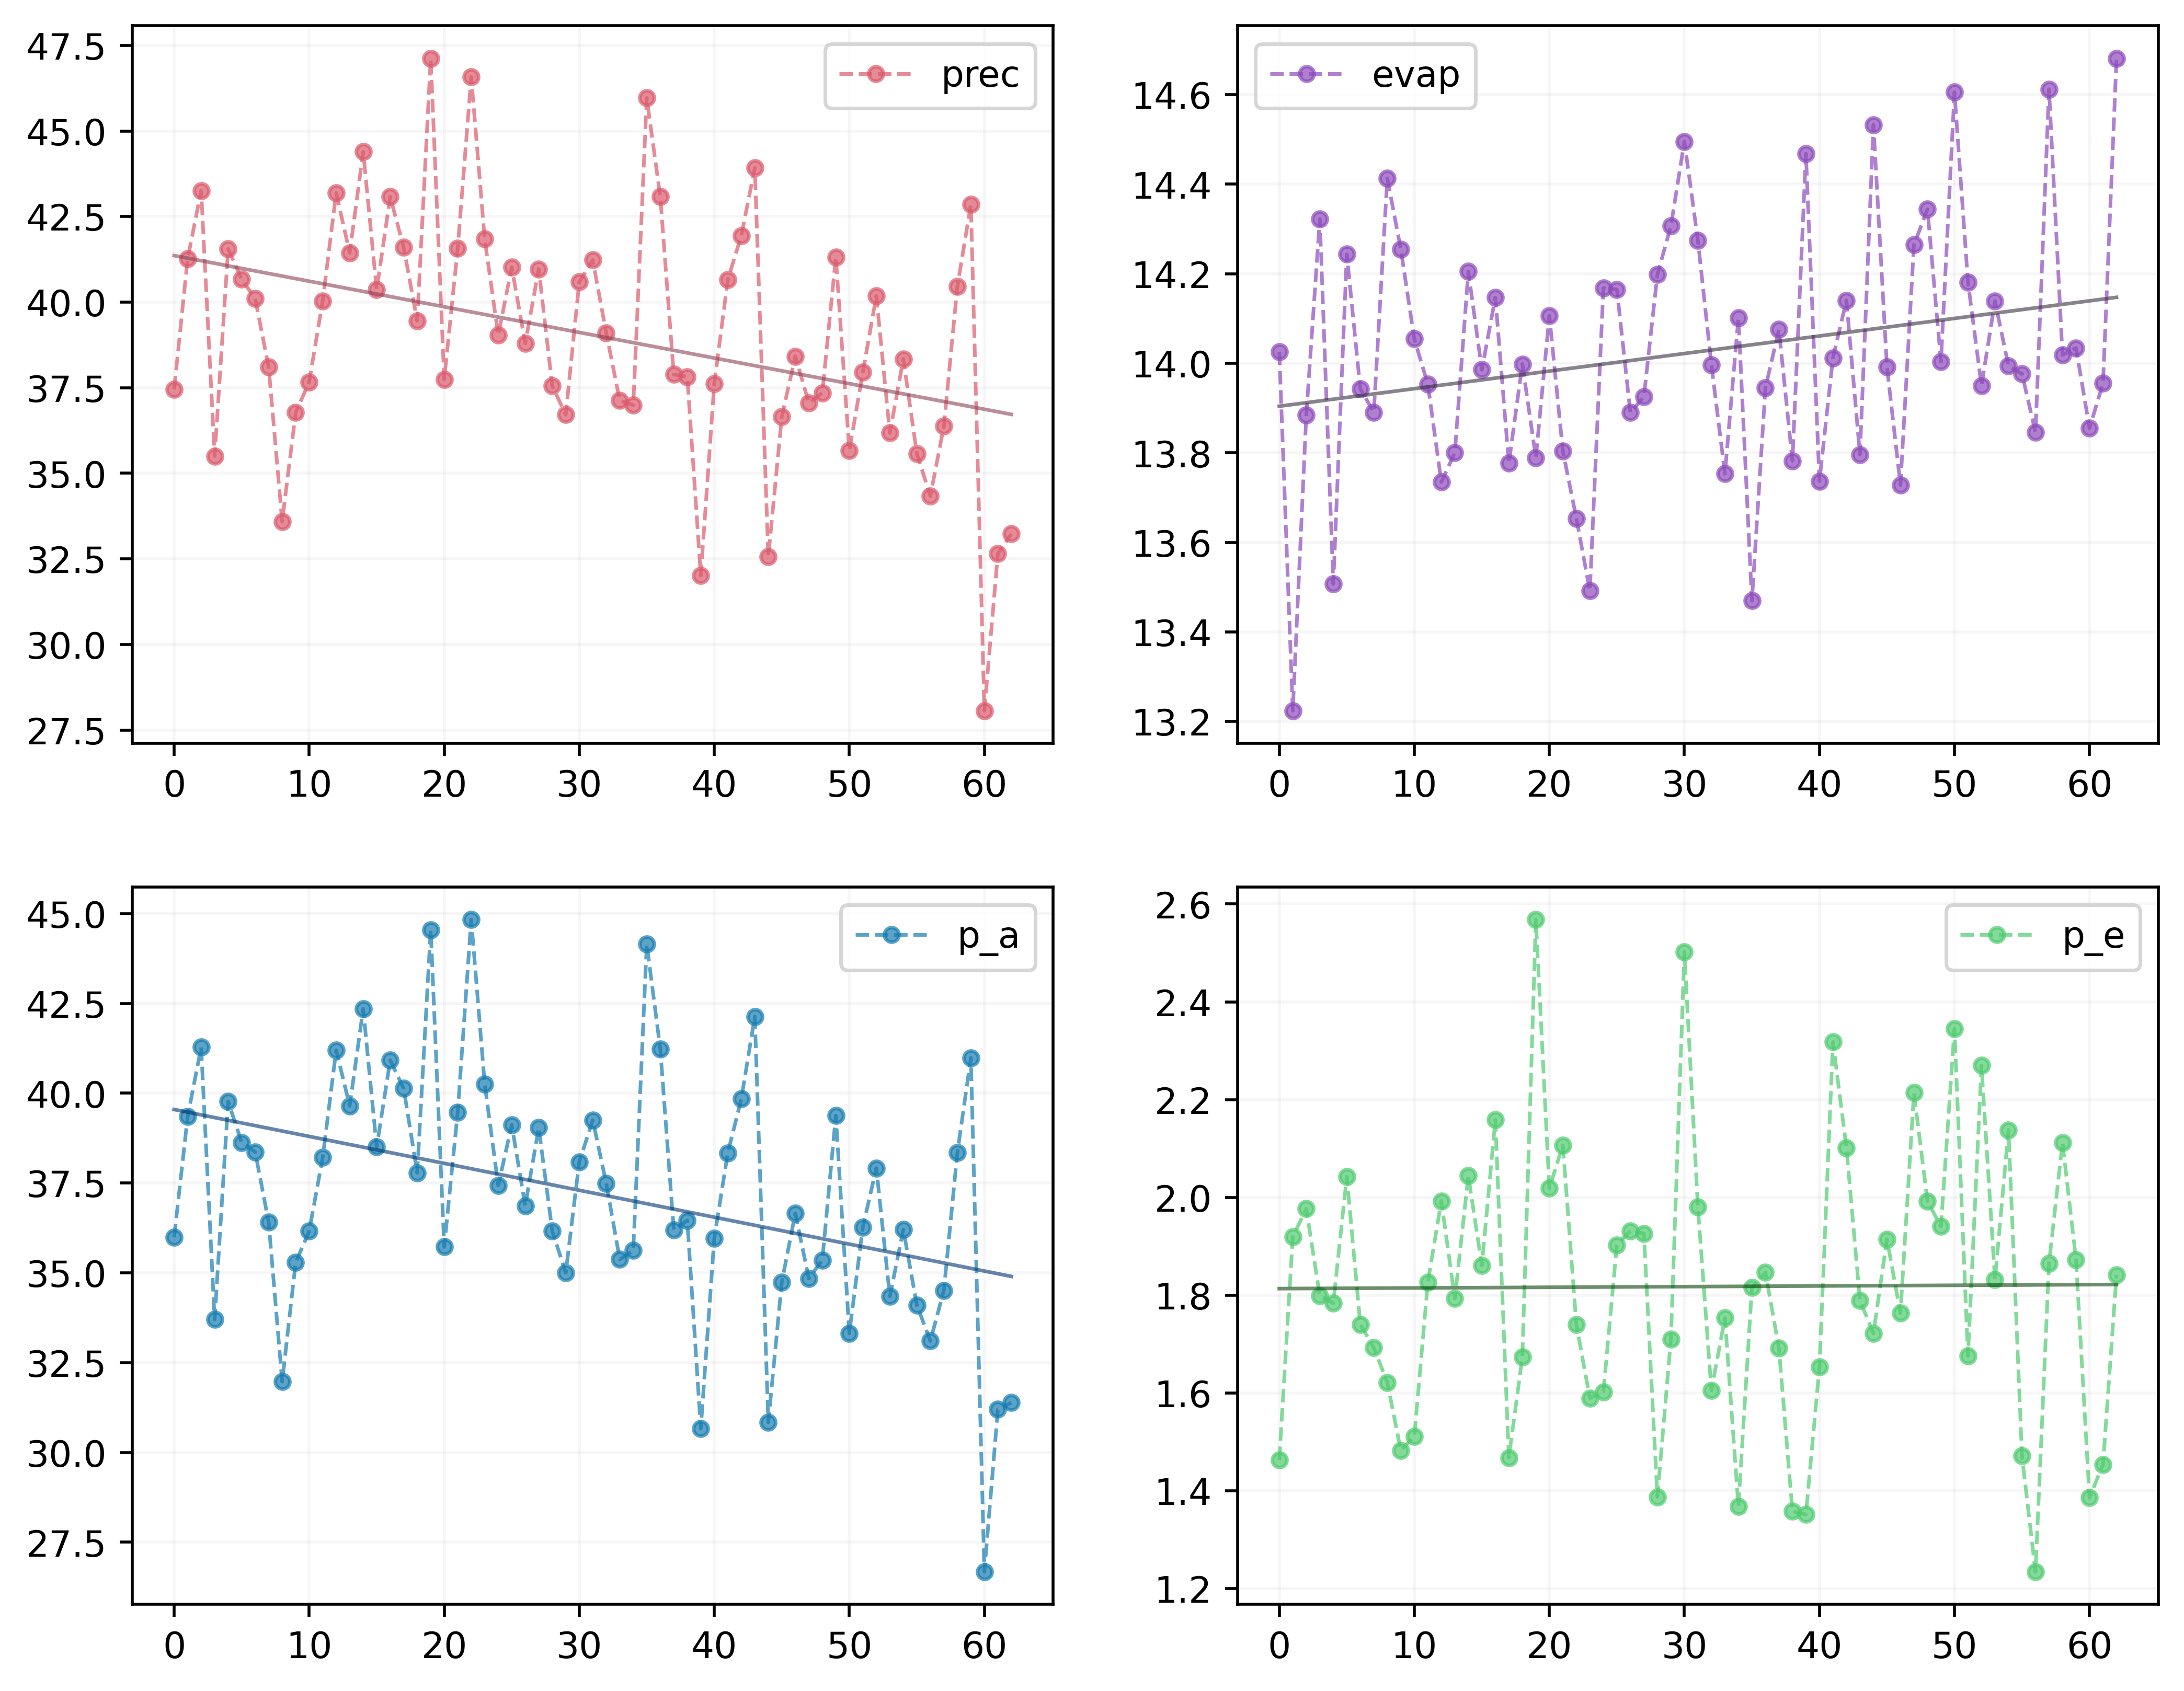

In [204]:
fig,axes = plt.subplots(2,2,figsize=(10,8),dpi=500)
x = np.arange(0,63)

### 1st
coeff1 = polyfit(x, dfflux['prec'], 1)
axes[0,0].plot(dfflux['prec'], '--o', ms=4, lw=1, alpha=0.7,c='#db5a6b', mfc='#db5a6b',label='prec')
axes[0,0].plot(x,coeff1[0]*x+coeff1[1], c='#8c4356',ls='-',lw=1,alpha=0.6)
print(poly1d(coeff1))
axes[0,0].legend()
axes[0,0].grid(alpha=0.1)

### 2nd
coeff2 = polyfit(x, dfflux['e'], 1)
axes[0,1].plot(-dfflux['e'], '--o', ms=4, lw=1, alpha=0.7,c='#8d4bbb', mfc='#8d4bbb',label='evap')
axes[0,1].plot(x,-(coeff2[0]*x+coeff2[1]), c='#392f41',ls='-',lw=1,alpha=0.6)
print(-poly1d(coeff2))
axes[0,1].legend()
axes[0,1].grid(alpha=0.1)

### 3rd
coeff3 = polyfit(x, dfflux['p_a'], 1)
axes[1,0].plot(dfflux['p_a'], '--o', ms=4, lw=1, alpha=0.7,c='#177cb0', mfc='#177cb0',label='p_a')
axes[1,0].plot(x,(coeff3[0]*x+coeff3[1]), c='#003472',ls='-',lw=1,alpha=0.6)
print(poly1d(coeff3))
axes[1,0].legend()
axes[1,0].grid(alpha=0.1)

### 4rd
coeff4 = polyfit(x, dfflux['p_e'], 1)
axes[1,1].plot(dfflux['p_e'], '--o', ms=4, lw=1, alpha=0.7,c='#4fcb6f', mfc='#4fcb6f',label='p_e')
axes[1,1].plot(x,(coeff4[0]*x+coeff4[1]), c='#084408',ls='-',lw=1,alpha=0.6)
print(poly1d(coeff4))
axes[1,1].legend()
axes[1,1].grid(alpha=0.1)

 
-0.161 x + 113.8
 
-0.003787 x - 12.09
 
0.009632 x + 4.364
 
-0.07874 x + 27.46


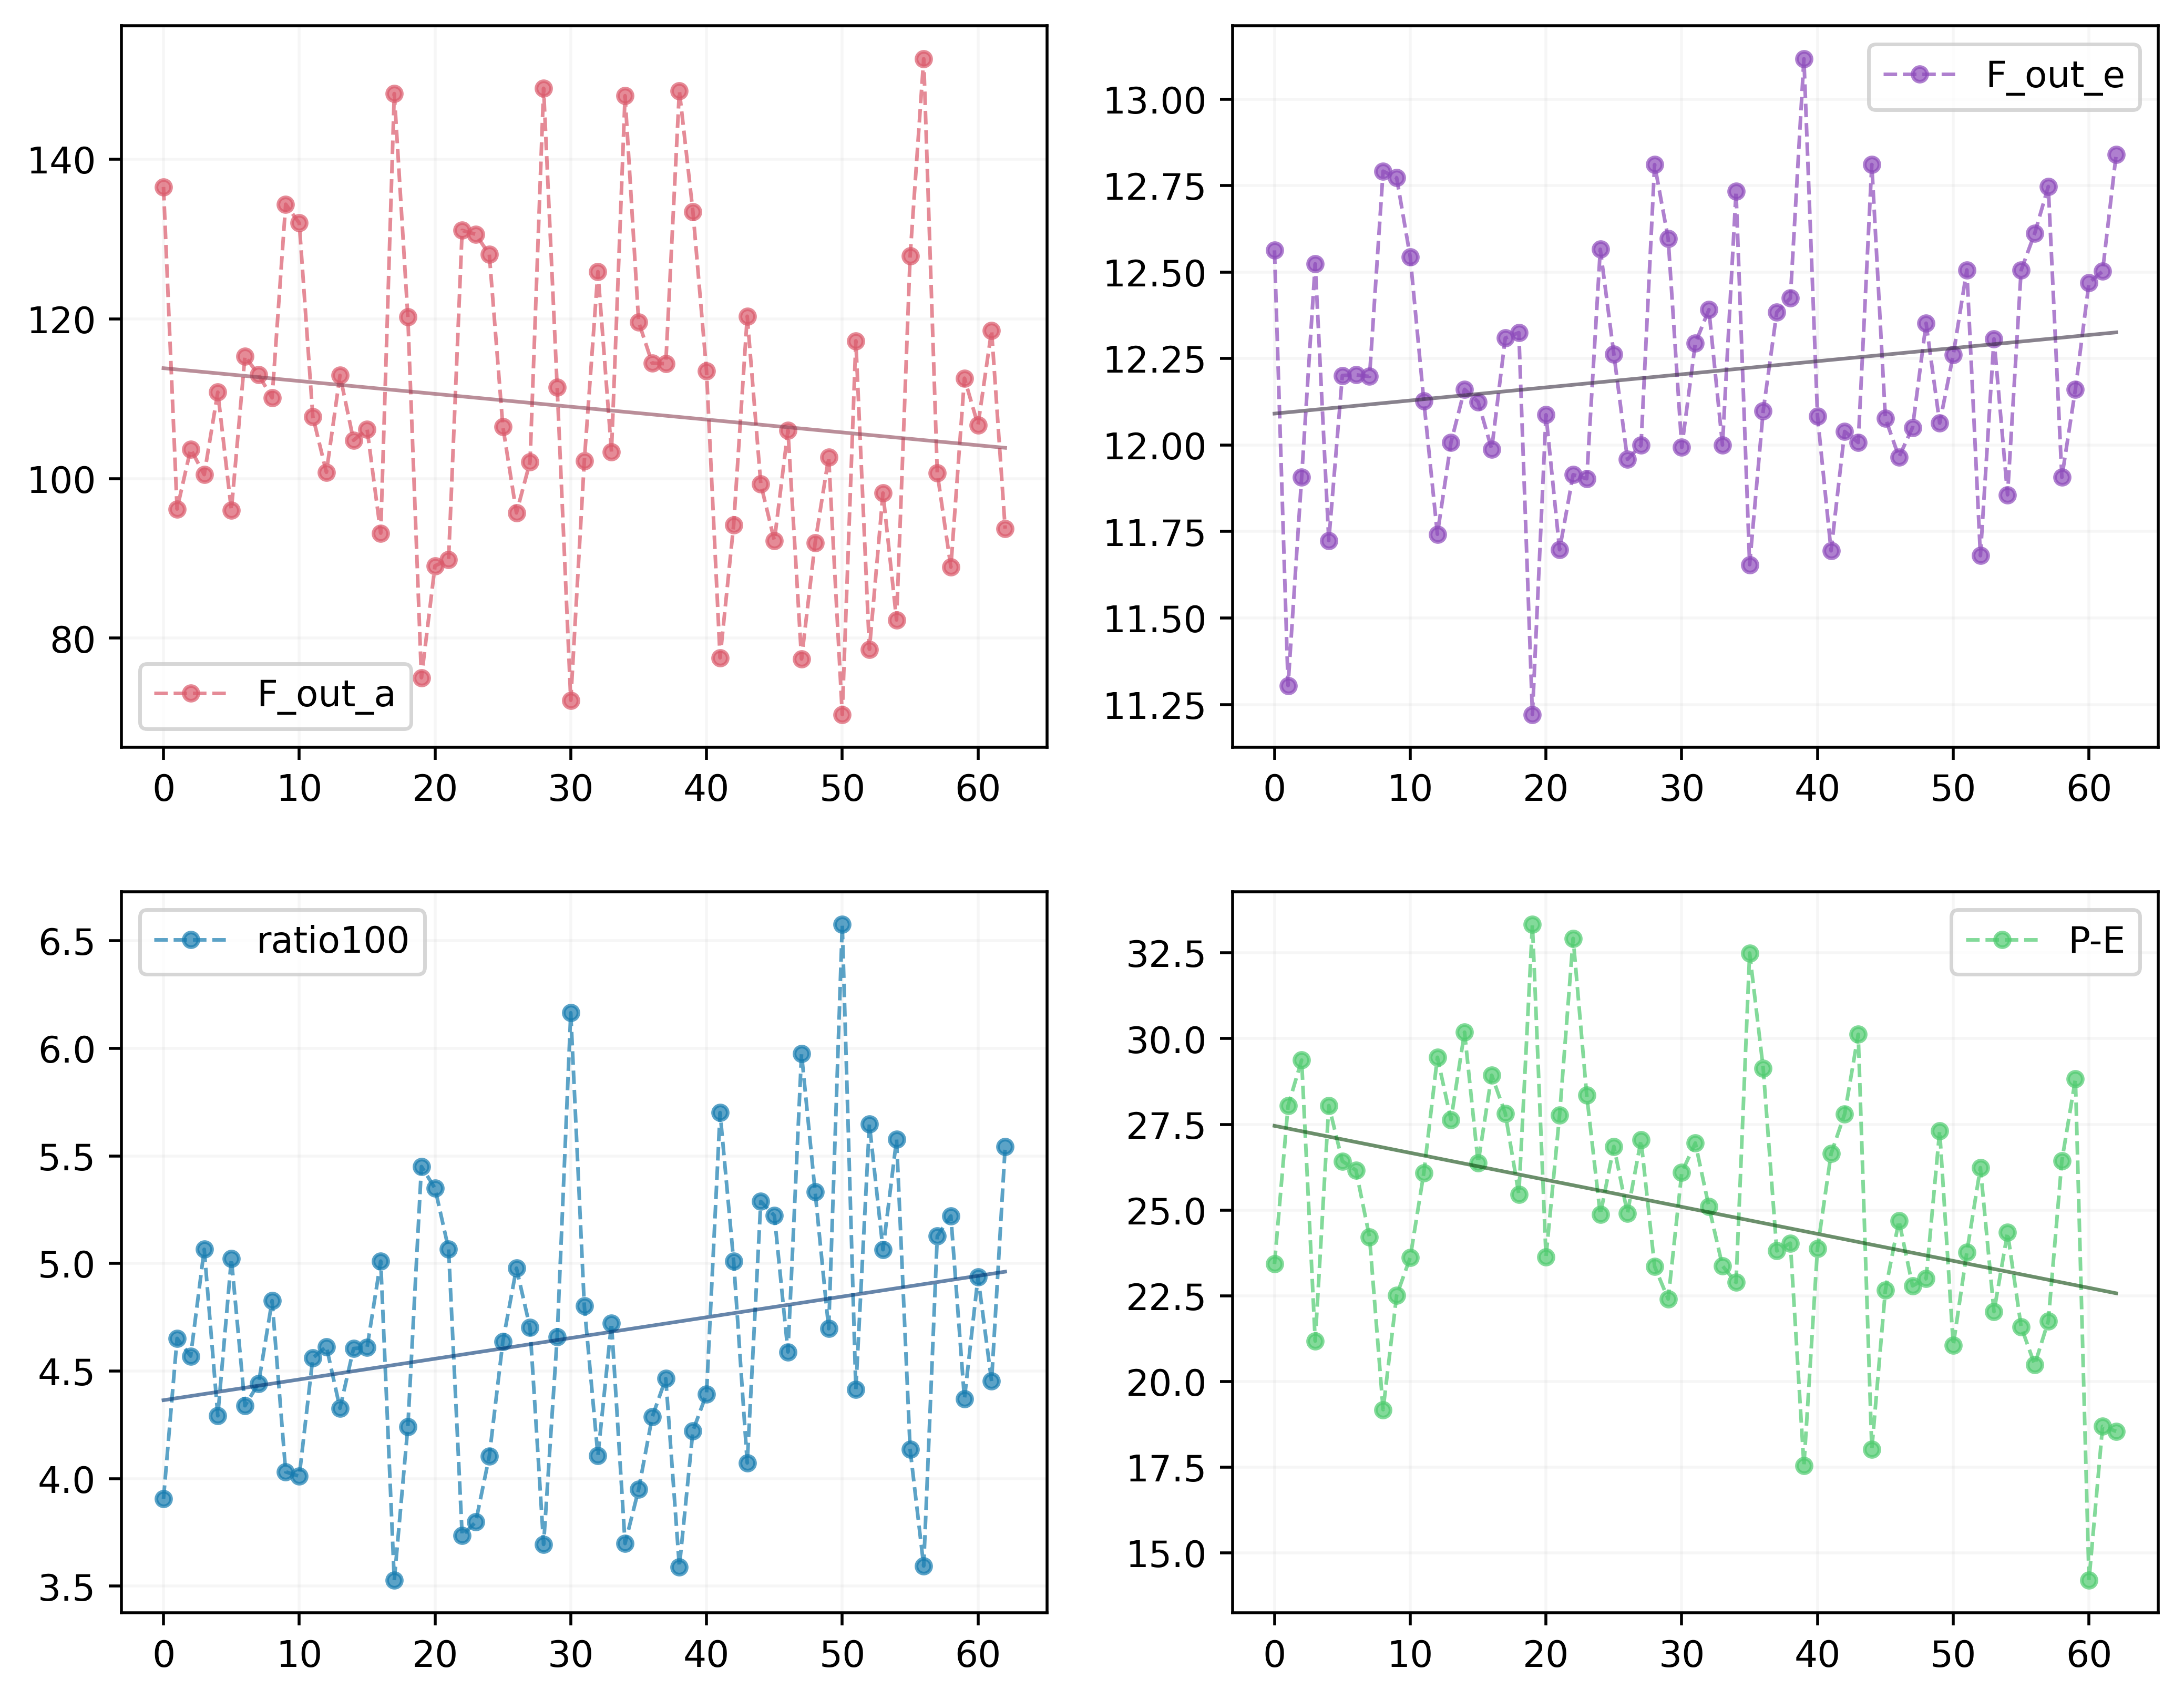

In [219]:
fig,axes = plt.subplots(2,2,figsize=(10,8),dpi=500)
x = np.arange(0,63)

### 1st
coeff1 = polyfit(x, dfflux['F_out_a'], 1)
axes[0,0].plot(dfflux['F_out_a'], '--o', ms=4, lw=1, alpha=0.7,c='#db5a6b', mfc='#db5a6b',label='F_out_a')
axes[0,0].plot(x,coeff1[0]*x+coeff1[1], c='#8c4356',ls='-',lw=1,alpha=0.6)
print(poly1d(coeff1))
axes[0,0].legend()
axes[0,0].grid(alpha=0.1)

### 2nd
coeff2 = polyfit(x, dfflux['F_out_e'], 1)
axes[0,1].plot(dfflux['F_out_e'], '--o', ms=4, lw=1, alpha=0.7,c='#8d4bbb', mfc='#8d4bbb',label='F_out_e')
axes[0,1].plot(x,(coeff2[0]*x+coeff2[1]), c='#392f41',ls='-',lw=1,alpha=0.6)
print(-poly1d(coeff2))
axes[0,1].legend()
axes[0,1].grid(alpha=0.1)

### 3rd
coeff3 = polyfit(x, dfflux['ratio100'], 1)
axes[1,0].plot(dfflux['ratio100'], '--o', ms=4, lw=1, alpha=0.7,c='#177cb0', mfc='#177cb0',label='ratio100')
axes[1,0].plot(x,(coeff3[0]*x+coeff3[1]), c='#003472',ls='-',lw=1,alpha=0.6)
print(poly1d(coeff3))
axes[1,0].legend()
axes[1,0].grid(alpha=0.1)

### 4rd
coeff4 = polyfit(x, dfflux['prec']+dfflux['e'], 1)
axes[1,1].plot(dfflux['prec']+dfflux['e'], '--o', ms=4, lw=1, alpha=0.7,c='#4fcb6f', mfc='#4fcb6f',label='P-E')
axes[1,1].plot(x,(coeff4[0]*x+coeff4[1]), c='#084408',ls='-',lw=1,alpha=0.6)
print(poly1d(coeff4))
axes[1,1].legend()
axes[1,1].grid(alpha=0.1)


pe  
0.0001352 x + 1.813
 
-0.07495 x + 39.55
 
0.009632 x + 4.364


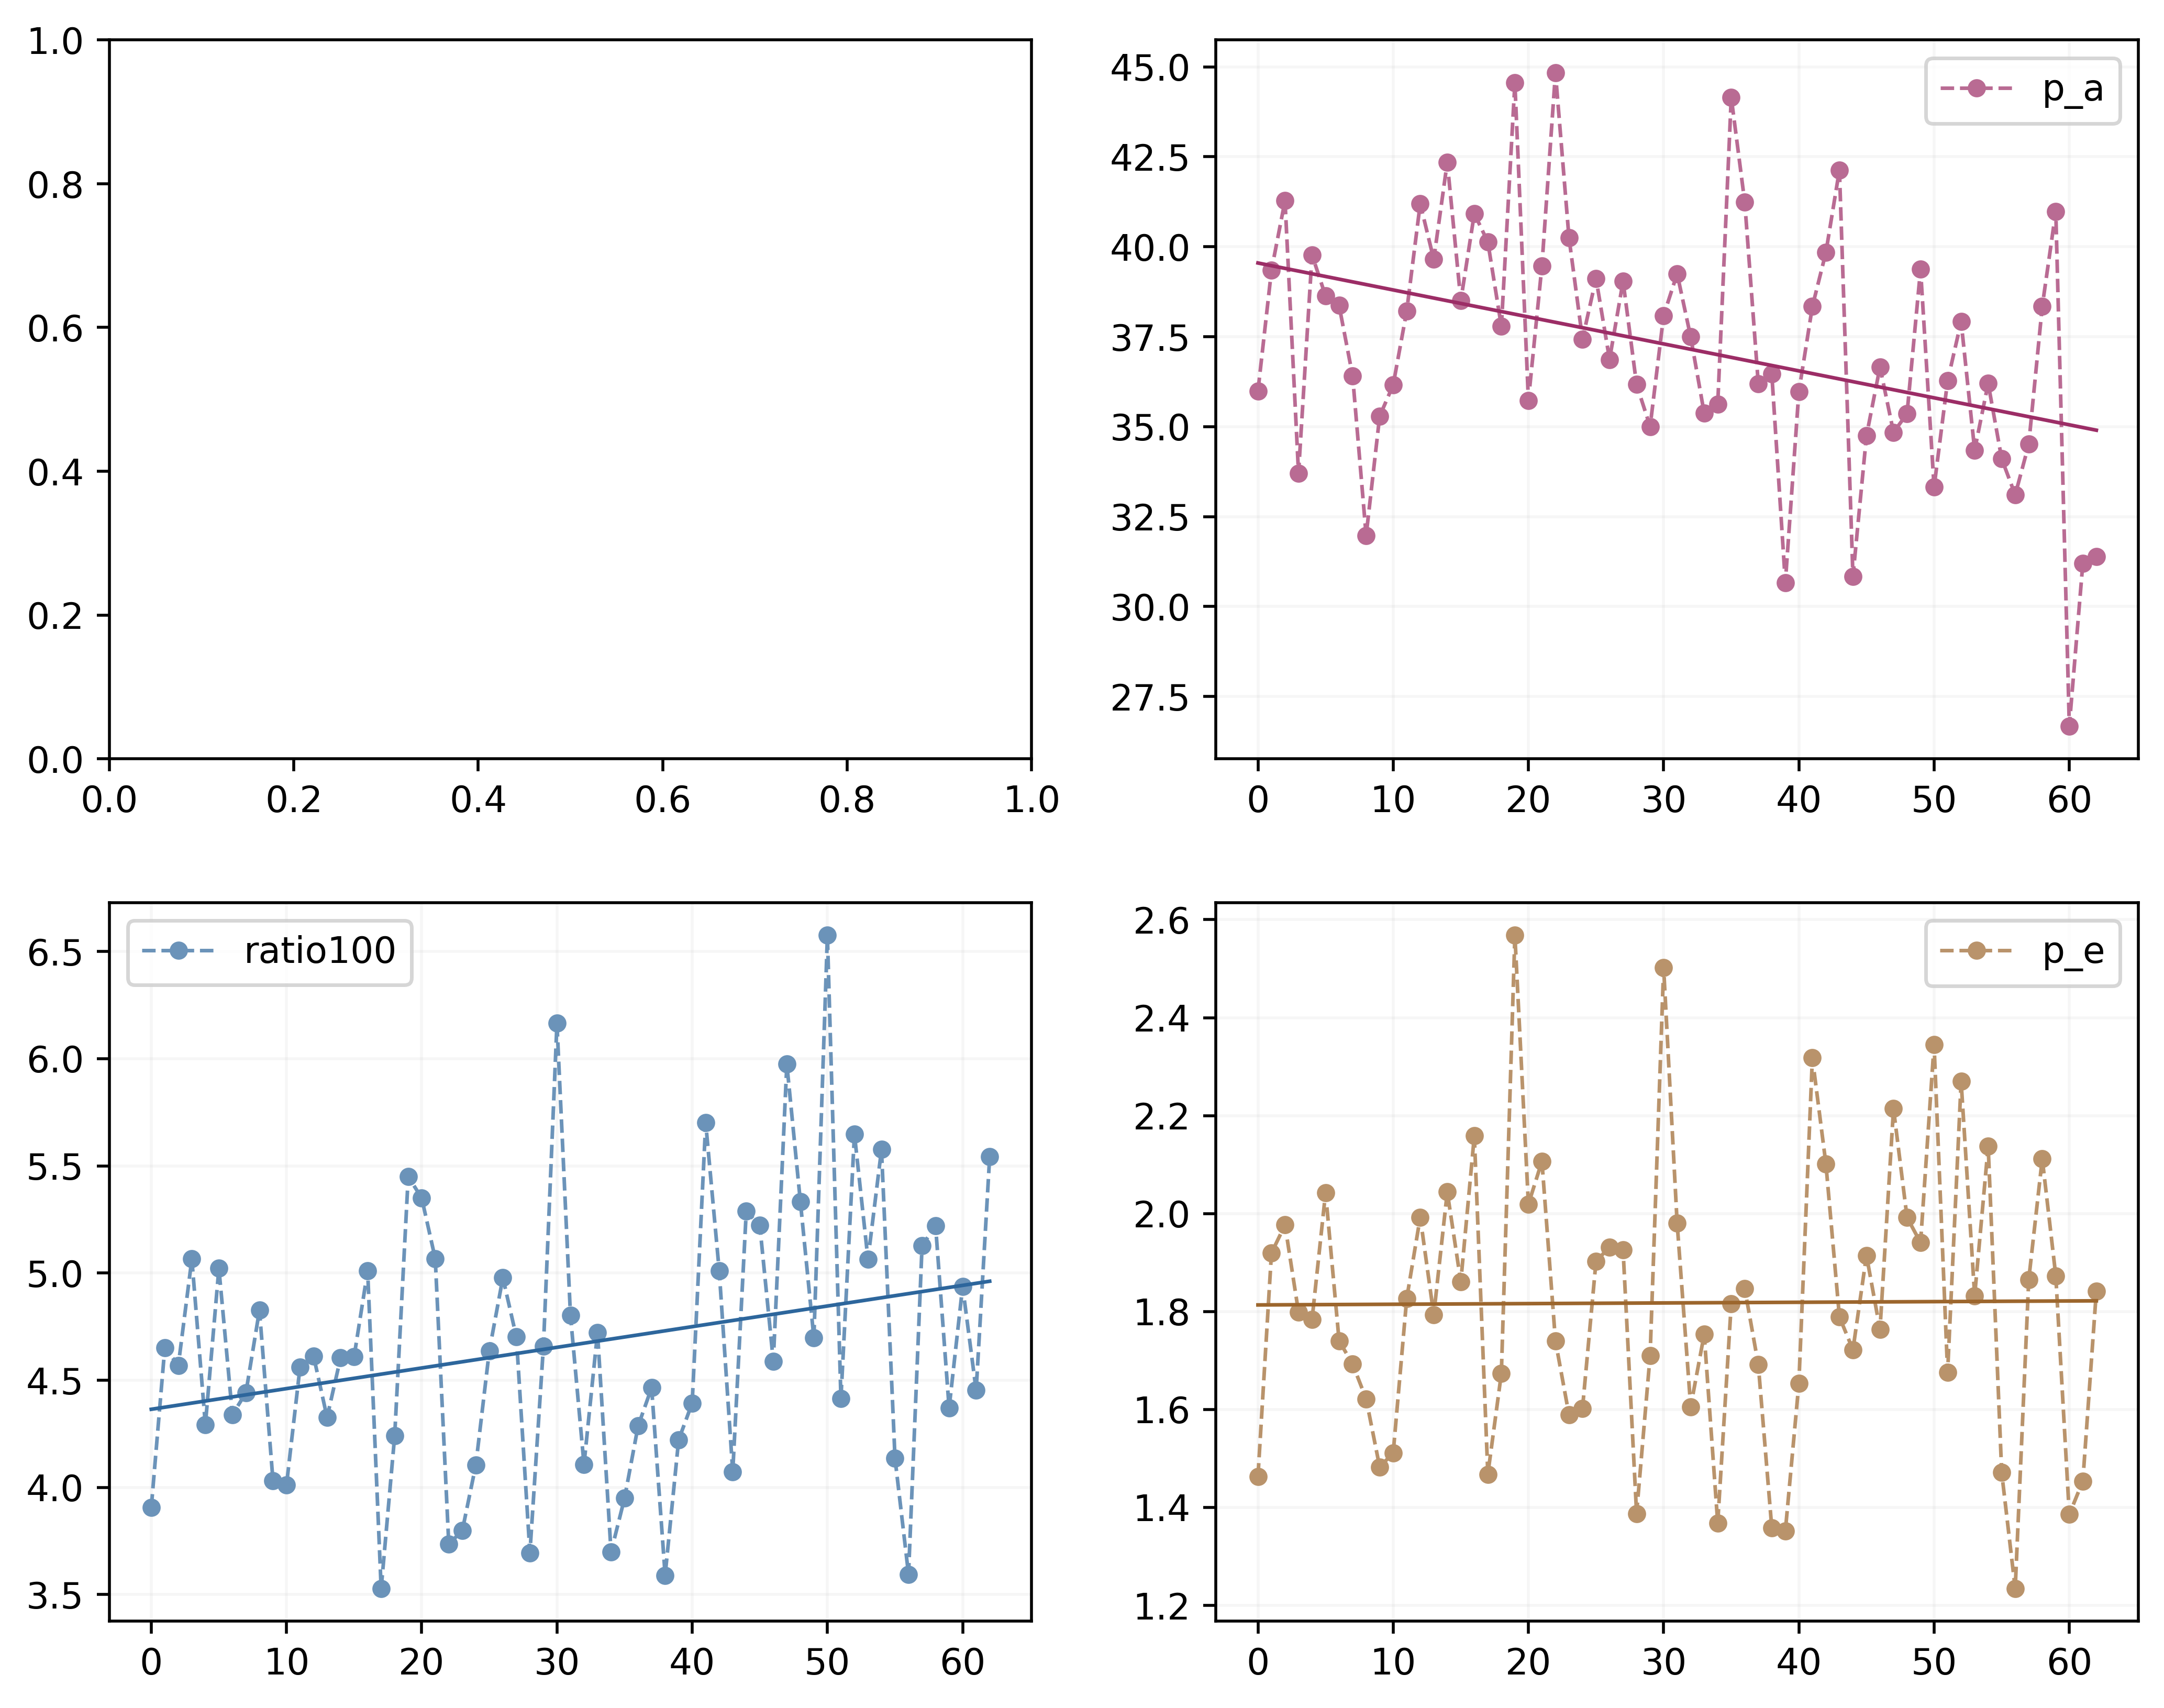

In [237]:
fig,axes = plt.subplots(2,2,figsize=(10,8),dpi=500)
x = np.arange(0,63)

### 1st
coeff4 = polyfit(x, dfflux['p_e'], 1)
axes[1,1].plot(dfflux['p_e'], '--o', ms=4, lw=1,c='#b9936b', mfc='#b9936b',label='p_e')
axes[1,1].plot(x,(coeff4[0]*x+coeff4[1]), c='#9c662d',ls='-',lw=1)
print('pe',poly1d(coeff4))
axes[1,1].legend()
axes[1,1].grid(alpha=0.1)

### 2nd

coeff3 = polyfit(x, dfflux['p_a'], 1)
axes[0,1].plot(dfflux['p_a'], '--o', ms=4, lw=1,c='#b96b93', mfc='#b96b93',label='p_a')
axes[0,1].plot(x,(coeff3[0]*x+coeff3[1]), c='#9c2d66',ls='-',lw=1)
print(poly1d(coeff3))
axes[0,1].legend()
axes[0,1].grid(alpha=0.1)

### 3rd
coeff3 = polyfit(x, dfflux['ratio100'], 1)
axes[1,0].plot(dfflux['ratio100'], '--o', ms=4, lw=1,c='#6b93b9', mfc='#6b93b9',label='ratio100')
axes[1,0].plot(x,(coeff3[0]*x+coeff3[1]), c='#2d669c',ls='-',lw=1)
print(poly1d(coeff3))
axes[1,0].legend()
axes[1,0].grid(alpha=0.1)
plt.savefig('Paperatio.pdf')


In [245]:
from stats import cr

In [258]:
cr(dfflux['p_a'])

(-4.721969505181433,
 37.22412129841269,
 -12.68524102241948,
 0.0015083271759389059,
 poly1d([-0.0749519, 39.5476301]))